In [1]:
from tidal_signal import MainBody

In [2]:
earth = MainBody('Earth')

In [3]:
#Coordinates of the station in radians
loc = dict(lat = 4.49,
           lon = -73.14,
           depth = 15)	#Paratebueno, Colombia

#Dictionary with the start, stop, and step data
date = dict(start = '2025-01-01 00:00:00',
            stop = '2025-01-28 00:00:00',
            step = '1h',
            time_frame = 'UTC')

#List of bodies to consider for tidal calculations
bodylist = ['Moon', 'Sun', 'Mercury', 'Venus', 'Mars', 'Jupiter']

In [32]:
Vgtid, et_utc = earth.V_g_tidal_body('Moon', loc_sta=loc, dates=date, nmax=6, time_array=True)
Vmean = Vgtid.mean()

In [ ]:
import spiceypy as spy

In [ ]:
#Kernels with the leaps seconds
kernel_dir = '/home/deivyastro/TrabajoGrado/EarthTides/pymcel/data/'
spy.furnsh([kernel_dir+'latest_leapseconds.tls',
            kernel_dir+'naif0012.tls'])

In [9]:
from datetime import datetime

In [ ]:
#Convert ET to UTC
utc_times = spy.et2utc(et_utc, format_str='ISOC', prec=2)	#Return an array with the date in UTC strings
utc_times = [datetime.fromisoformat(utc) for utc in utc_times]	#Return datatime objects

datetime.datetime(2025, 1, 1, 0, 0)

In [30]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [36]:
len(utc_times)-1

648

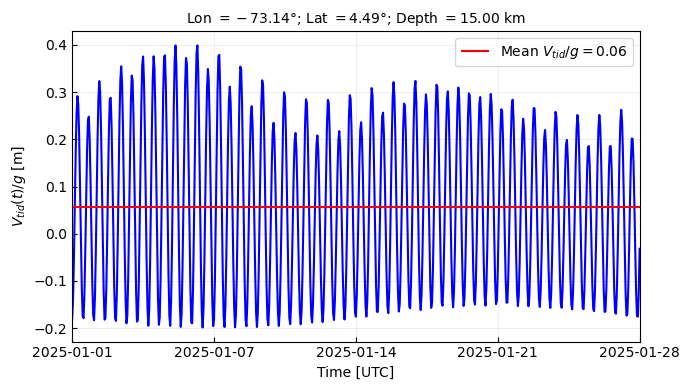

In [46]:
#Plot of Vtid/g in time
fig, ax = plt.subplots(figsize=(7,4))

#Total signal
ax.plot(utc_times, Vgtid, color='blue')
ax.hlines(Vmean, utc_times[0], utc_times[-1], color='red', label=r'Mean $V_{tid}/g=%.2f$'%(Vmean))
ax.set_xlabel('Time [UTC]', fontsize=10)
ax.set_ylabel(r'$V_{tid}(t)/g$ [m]', fontsize=10)
ax.set_title('Lon $= %.2f$°; Lat $= %.2f$°; Depth $= %.2f$ km'%(loc['lon'], loc['lat'], loc['depth']), fontsize=10)
ax.legend(fontsize=10)

ax.xaxis.set_tick_params(direction='in', which='both')
ax.yaxis.set_tick_params(direction='in', which='both')

#Taking 5 equally spaced times
ticks = np.linspace(0, len(utc_times)-1, 5, dtype=int)
ax.set_xticks([utc_times[i] for i in ticks])

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax.grid(alpha=0.2)
ax.margins(x=0, y=0.05)

#fig.suptitle(f'Figura 4. Earth Tides during a lunar month ($n = %s $)'%nmax)
fig.tight_layout();

### Pendients:

1. Configuration of kernels file

In [6]:
#from TSpy_package.src.tspy import kernels_config